**Parte 1** - Exemplo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Leitura e apresentação dos Dataset. Os quatro atributos independentes são valores contínuos que representam:
*   Sepal.Length - Comprimento da Sépala
*   Sepal.Width - Largura da Sépala
*   Petal.Length - Comprimento da Pétala
*   Petal.Width - Largura da Sépala

O último atributo representa a espécie da planta, que pode ser setosa (0), versicolor (1) ou virginica (2).

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
print ('Formato dos dados independentes: ',X_iris.shape)
print ('Formato dos resultados (classe): ',y_iris.shape)


Formato dos dados independentes:  (150, 4)
Formato dos resultados (classe):  (150,)


In [ ]:
X_iris[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Exclui as colunas relacionadas às pétalas para criar um modelo com base apenas nos dois primeiros atributos. E seleciona apenas os 100 primeiros registros para tornar um problema de classificação binária.

In [ ]:
X = X_iris[:100,:2]
y = y_iris[:100]

print(X[:10])
print(y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Realiza a transformação dos dados usando a normalização padrão (Z-Score).

In [ ]:
from sklearn.preprocessing import StandardScaler

tranform = StandardScaler()
X = tranform.fit_transform(X)

print(X[0:10])

[[-0.5810659   0.84183714]
 [-0.89430898 -0.2078351 ]
 [-1.20755205  0.21203379]
 [-1.36417359  0.00209934]
 [-0.73768744  1.05177159]
 [-0.11120129  1.68157493]
 [-1.36417359  0.63190269]
 [-0.73768744  0.63190269]
 [-1.67741667 -0.41776955]
 [-0.89430898  0.00209934]]


Desenha os pontos do conjunto com o comprimento (eixo x) e a largura da sépala (eixo y), usando cores diferentes para cada tipo de flor:
1.   setosa (0) - vermelho
2.   versicolor (1) - amarelo


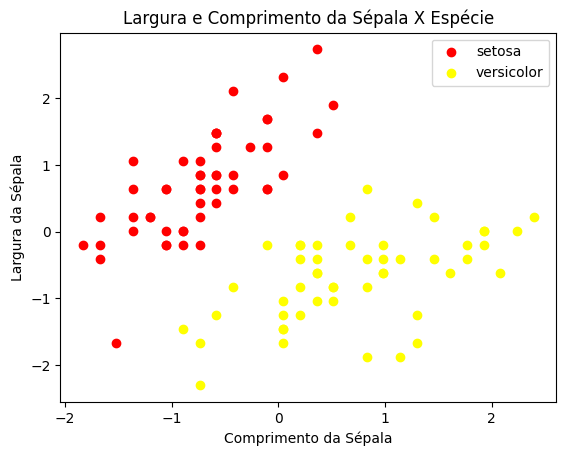

In [ ]:
px = X[:, 0][y == 0]
py = X[:, 1][y == 0]
plt.scatter(px, py, c='red')

px = X[:, 0][y == 1]
py = X[:, 1][y == 1]
plt.scatter(px, py, c='yellow')

plt.title('Largura e Comprimento da Sépala X Espécie')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)
plt.show()

Altera a classe de quatro exemplos para que existam valores errados e apresenta o gráfico novamente.

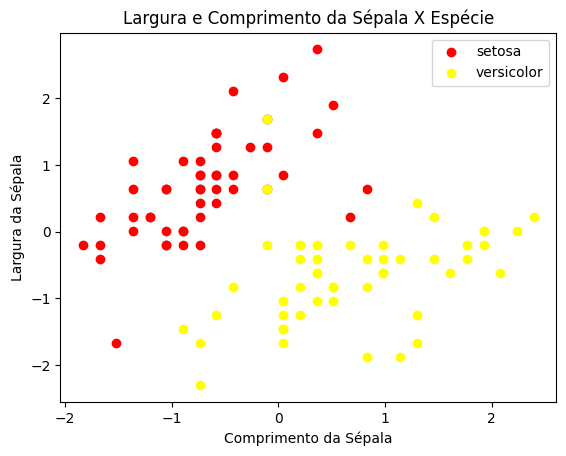

In [ ]:
y[5]=1
y[20]=1
y[70]=0
y[85]=0

px = X[:, 0][y == 0]
py = X[:, 1][y == 0]
plt.scatter(px, py, c='red')

px = X[:, 0][y == 1]
py = X[:, 1][y == 1]
plt.scatter(px, py, c='yellow')

plt.title('Largura e Comprimento da Sépala X Espécie')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)
plt.show()


Divide o dataset em dois conjuntos, um para treinamento e outro para teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33, shuffle=True)

print('Formato dos dados de treinamento')
print (X_train.shape, y_train.shape)

print('Formato dos dados de teste')
print (X_test.shape, y_test.shape)


Formato dos dados de treinamento
(75, 2) (75,)
Formato dos dados de teste
(25, 2) (25,)


Cria e treina um modelo de classificação linear estocástica.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

modelo = SGDClassifier(random_state=0)

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('Coeficientes w1 e w2 das três retas')
print (modelo.coef_)
print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print('Acurácia do modelo')
print(acc)

Coeficientes w1 e w2 das três retas
[[ 6.00082519 -7.14974708]]
Coeficiente w0 das três retas
[0.44015348]
Acurácia do modelo
0.92


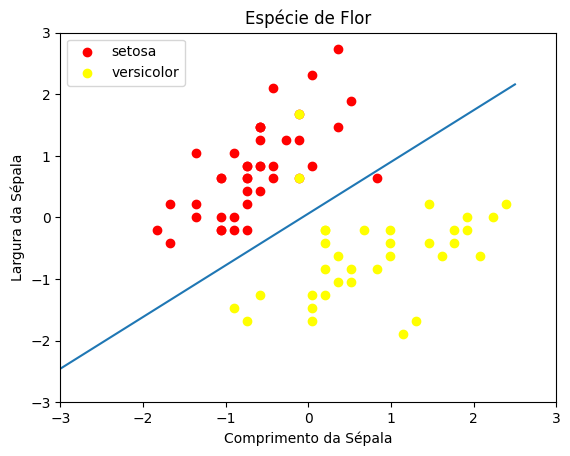

In [ ]:
xs = np.arange(-3,3,0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

px = X_train[:, 0][y_train == 0]
py = X_train[:, 1][y_train == 0]
plt.scatter(px, py, c='red')

px = X_train[:, 0][y_train == 1]
py = X_train[:, 1][y_train == 1]
plt.scatter(px, py, c='yellow')

plt.title('Espécie de Flor')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)
ys = (-modelo.intercept_[0]-xs*modelo.coef_[0,0])/modelo.coef_[0,1]
plt.plot(xs,ys)
plt.show()

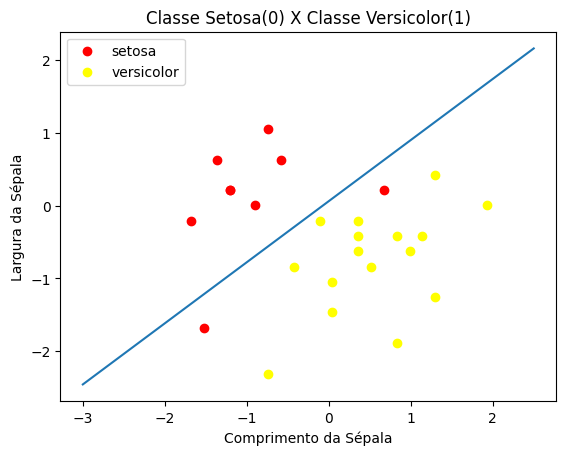

In [ ]:
px = X_test[:, 0][y_test == 0]
py = X_test[:, 1][y_test == 0]
plt.scatter(px, py, c='red')

px = X_test[:, 0][y_test == 1]
py = X_test[:, 1][y_test == 1]
plt.scatter(px, py, c='yellow')

plt.title('Classe Setosa(0) X Classe Versicolor(1)')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)

ys = (-modelo.intercept_[0]-xs*modelo.coef_[0,0])/modelo.coef_[0,1]
plt.plot(xs,ys)

plt.show()

Apresenta a matriz de confusão

[[ 7  2]
 [ 0 16]]


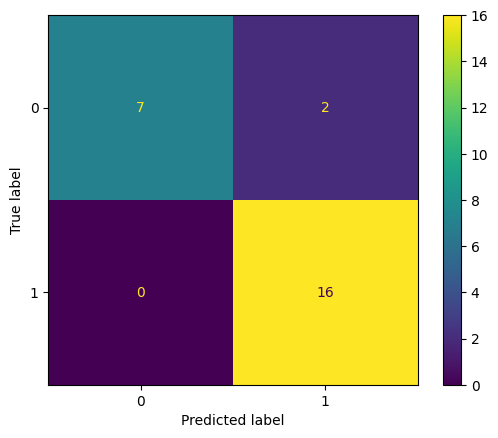

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matriz = confusion_matrix(y_test, y_pred)
print(matriz)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()
plt.show()


Apresenta outras medidas de avaliação

In [ ]:
from sklearn.metrics import classification_report

resultados = classification_report(y_test, y_pred)

print(resultados)

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.89      1.00      0.94        16

    accuracy                           0.92        25
   macro avg       0.94      0.89      0.91        25
weighted avg       0.93      0.92      0.92        25



Apresenta a curva ROC

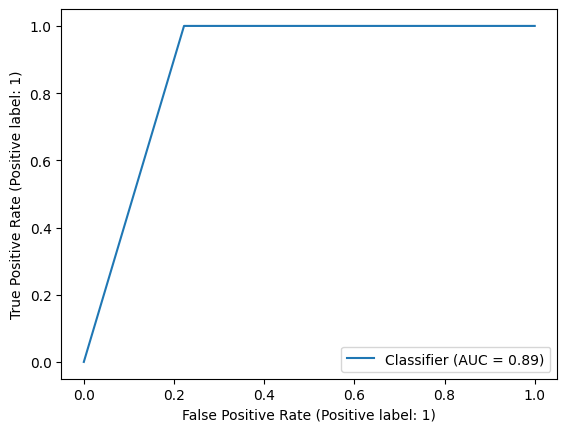

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

**Parte 2** - Atividade

Importe o Dataset novamente, apague as duas últimas colunas com as médidas das pétalas e transforme os dados como feito anteriormente.

In [ ]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
X = X_iris[:,:2]
y = y_iris[:]
tranform = StandardScaler()
X = tranform.fit_transform(X)

Apresente o diagrama de dispersão das três espécies do flores com cores diferentes.

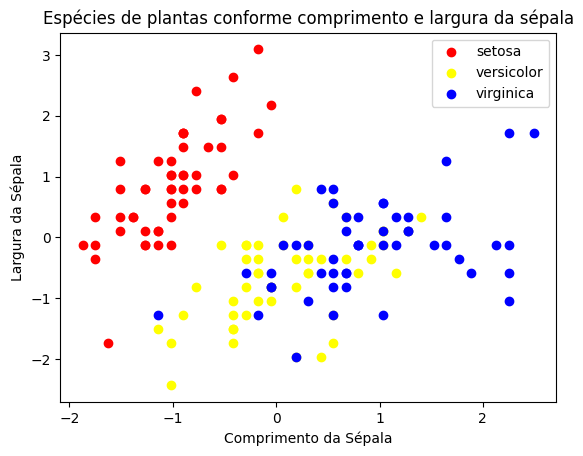

In [ ]:
px = X[:, 0][y == 0]
py = X[:, 1][y == 0]
plt.scatter(px, py, c='red')

px = X[:, 0][y == 1]
py = X[:, 1][y == 1]
plt.scatter(px, py, c='yellow')

px = X[:, 0][y == 2]
py = X[:, 1][y == 2]
plt.scatter(px, py, c='blue')

plt.title('Espécies de plantas conforme comprimento e largura da sépala')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)

plt.show()

Treine o modelo para classificar as três diferentes espécies de plantas e apresente os coeficientes das retas

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33,shuffle=True)

modelo = SGDClassifier(random_state=0)

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print('Coeficientes w1 e w2 das três retas')
print (modelo.coef_)
print('Coeficiente w0 das três retas')
print (modelo.intercept_)
print('Acurácia do modelo')
print(acc)

Coeficientes w1 e w2 das três retas
[[-26.76360831  14.99372782]
 [ -3.04938538  -4.51554783]
 [  3.68240928   0.79422987]]
Coeficiente w0 das três retas
[-22.88260318  -0.6914851   -3.4292662 ]
Acurácia do modelo
0.7368421052631579


Apresente o diagrama de dispersão das três espécies de flores com cores diferentes e as três retas que os separam

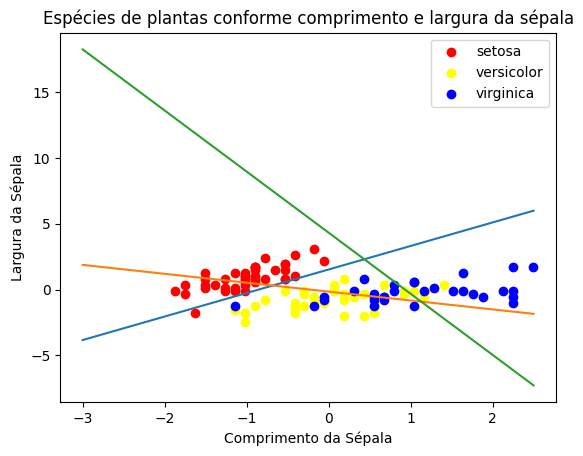

In [ ]:
px = X_train[:, 0][y_train == 0]
py = X_train[:, 1][y_train == 0]
plt.scatter(px, py, c='red')

px = X_train[:, 0][y_train == 1]
py = X_train[:, 1][y_train == 1]
plt.scatter(px, py, c='yellow')

px = X_train[:, 0][y_train == 2]
py = X_train[:, 1][y_train == 2]
plt.scatter(px, py, c='blue')

plt.title('Espécies de plantas conforme comprimento e largura da sépala')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.legend(iris.target_names)

ys = (-modelo.intercept_[0]-xs*modelo.coef_[0,0])/modelo.coef_[0,1]
plt.plot(xs,ys)
ys = (-modelo.intercept_[1]-xs*modelo.coef_[1,0])/modelo.coef_[1,1]
plt.plot(xs,ys)
ys = (-modelo.intercept_[2]-xs*modelo.coef_[2,0])/modelo.coef_[2,1]
plt.plot(xs,ys)

plt.show()

Apresente a matriz de confusão

[[ 8  0  0]
 [ 0  8  3]
 [ 0  7 12]]


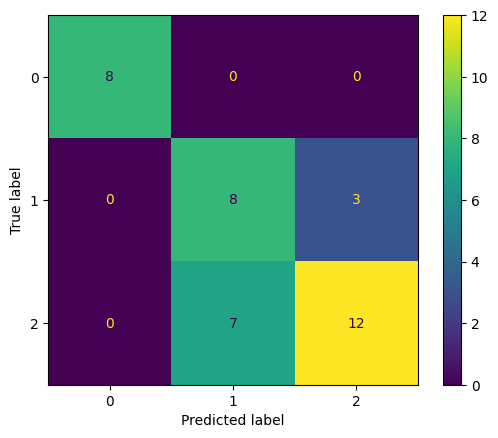

In [ ]:
matriz = confusion_matrix(y_test, y_pred)
print(matriz)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()
plt.show()

Apresente as demais métricas de avaliação (relatório de classificação)

In [ ]:
resultados = classification_report(y_test, y_pred)

print(resultados)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.53      0.73      0.62        11
           2       0.80      0.63      0.71        19

    accuracy                           0.74        38
   macro avg       0.78      0.79      0.77        38
weighted avg       0.76      0.74      0.74        38

